<a href="https://colab.research.google.com/github/marianelaruiz/Analise-de-Risco-de-Credito/blob/main/Banco_Risco_Relativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Risco Relativo - Banco** ⚓





# **Importando os dados**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
# Importar a biblioteca
import pandas as pd

# Ler um arquivo CSV
df = pd.read_csv('/content/drive/MyDrive/Projeto3-Risco-Relativo/dataset_banco_v5.csv')

# Mostrar as primeiras linhas do DataFrame
df.head(5)

user_id  age sex  number_dependents  last_month_salary  \
0        1   55   F                  0               2200   
1        2   44   M                  0               7499   
2        3   54   M                  0               5900   
3        4   54   F                  0               2167   
4        5   42   M                  2              10415   

   number_times_delayed_payment_loan_30_59_days  more_90_days_overdue  \
0                                             0                     0   
1                                             0                     0   
2                                             0                     0   
3                                             0                     0   
4                                             0                     0   

   number_times_delayed_payment_loan_60_89_days  \
0                                             0   
1                                             0   
2                                             1   
3                                             0   
4                                             0   

   using_lines_not_secured_personal_assets_pct  debt_ratio_pct  ...  \
0                                        66.71           15.31  ...   
1                                         0.71           14.88  ...   
2                                         9.12           35.16  ...   
3                                        11.27            6.60  ...   
4                                        32.40           35.22  ...   

   quartil_more_90_days  quartil_delayed_payment  quartil_secured_lines  \
0                     2                        1                      4   
1                     2                        3                      1   
2                     3                        3                      2   
3                     4                        1                      2   
4                     2                        3                      3   

   quartil_total_loans quartil_last_month_salary quartil_number_dependent  \
0                    1                         2                        1   
1                    4                         4                        2   
2                    4                         3                        2   
3                    1                         2                        3   
4                    3                         4                        4   

   age_group  last_month_salary_group  faixa_etaria_age  \
0      52-63                1501-4369      51 - 64 anos   
1      42-52                    +7416      41 - 50 anos   
2      52-63                4371-7416      51 - 64 anos   
3      52-63                1501-4369      51 - 64 anos   
4      42-52                    +7416      41 - 50 anos   

   faixa_last_month_salary  
0                1501-4370  
1               7417-20000  
2                4371-7416  
3                1501-4370  
4               7417-20000  

[5 rows x 28 columns]

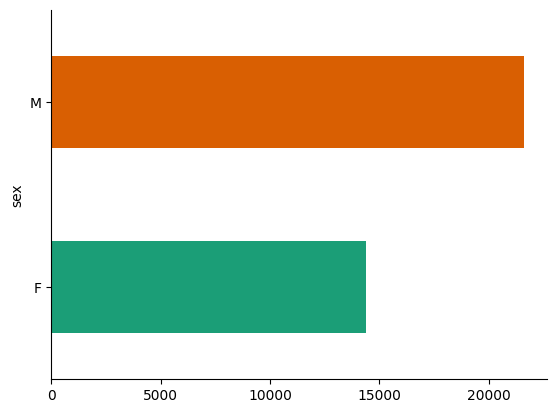

In [3]:
# @title sex

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
# principais medidas de centralidade e dispersão para as variáveis numéricas do dataset.
df.describe()

user_id           age  number_dependents  last_month_salary  \
count  36000.000000  36000.000000       36000.000000       3.600000e+04   
mean   18000.500000     52.417417           0.738222       5.340227e+03   
std    10392.449182     14.791331           1.110608       1.189699e+04   
min        1.000000     21.000000           0.000000       0.000000e+00   
25%     9000.750000     41.000000           0.000000       1.500000e+03   
50%    18000.500000     52.000000           0.000000       4.370000e+03   
75%    27000.250000     63.000000           1.000000       7.416000e+03   
max    36000.000000    109.000000          13.000000       1.560100e+06   

       number_times_delayed_payment_loan_30_59_days  more_90_days_overdue  \
count                                  36000.000000          36000.000000   
mean                                       0.419278              0.260806   
std                                        4.144020              4.121365   
min                                        0.000000              0.000000   
25%                                        0.000000              0.000000   
50%                                        0.000000              0.000000   
75%                                        0.000000              0.000000   
max                                       98.000000             98.000000   

       number_times_delayed_payment_loan_60_89_days  \
count                                  36000.000000   
mean                                       0.237861   
std                                        4.105515   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        0.000000   
max                                       98.000000   

       using_lines_not_secured_personal_assets_pct  debt_ratio_pct  \
count                                 3.600000e+04    3.600000e+04   
mean                                  5.807040e+02    3.515801e+04   
std                                   2.234071e+04    2.011635e+05   
min                                   0.000000e+00    0.000000e+00   
25%                                   2.950000e+00    1.763000e+01   
50%                                   1.497000e+01    3.662000e+01   
75%                                   5.485000e+01    8.735250e+01   
max                                   2.200000e+06    3.070010e+07   

       default_flag  ...  count_loan_other   total_loans  quartil_age  \
count  36000.000000  ...      36000.000000  36000.000000  36000.00000   
mean       0.018972  ...          7.465917      8.481528      2.50000   
std        0.136429  ...          4.799923      5.181148      1.11805   
min        0.000000  ...          0.000000      0.000000      1.00000   
25%        0.000000  ...          4.000000      5.000000      1.75000   
50%        0.000000  ...          7.000000      8.000000      2.50000   
75%        0.000000  ...         10.000000     11.000000      3.25000   
max        1.000000  ...         56.000000     57.000000      4.00000   

       quartil_debt_ratio  quartil_more_90_days  quartil_delayed_payment  \
count         36000.00000           36000.00000              36000.00000   
mean              2.50000               2.50000                  2.50000   
std               1.11805               1.11805                  1.11805   
min               1.00000               1.00000                  1.00000   
25%               1.75000               1.75000                  1.75000   
50%               2.50000               2.50000                  2.50000   
75%               3.25000               3.25000                  3.25000   
max               4.00000               4.00000                  4.00000   

       quartil_secured_lines  quartil_total_loans  quartil_last_month_salary  \
count            36000.00000          36000.00000                36000.00000   
mean        

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 28 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   user_id                                       36000 non-null  int64  
 1   age                                           36000 non-null  int64  
 2   sex                                           36000 non-null  object 
 3   number_dependents                             36000 non-null  int64  
 4   last_month_salary                             36000 non-null  int64  
 5   number_times_delayed_payment_loan_30_59_days  36000 non-null  int64  
 6   more_90_days_overdue                          36000 non-null  int64  
 7   number_times_delayed_payment_loan_60_89_days  36000 non-null  int64  
 8   using_lines_not_secured_personal_assets_pct   36000 non-null  float64
 9   debt_ratio_pct                                36000 non-null 

In [6]:
df[df.duplicated()]

Empty DataFrame
Columns: [user_id, age, sex, number_dependents, last_month_salary, number_times_delayed_payment_loan_30_59_days, more_90_days_overdue, number_times_delayed_payment_loan_60_89_days, using_lines_not_secured_personal_assets_pct, debt_ratio_pct, default_flag, count_loan_real_estate, count_loan_other, total_loans, categoria_number_dependents, categoria_default_flag, quartil_age, quartil_debt_ratio, quartil_more_90_days, quartil_delayed_payment, quartil_secured_lines, quartil_total_loans, quartil_last_month_salary, quartil_number_dependent, age_group, last_month_salary_group, faixa_etaria_age, faixa_last_month_salary]
Index: []

[0 rows x 28 columns]

# **Outliers**

## Histograma e Boxplot das variáveis numéricas

In [7]:
# Importando as librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Variável Age

In [8]:
df['age'].describe()

count    36000.000000
mean        52.417417
std         14.791331
min         21.000000
25%         41.000000
50%         52.000000
75%         63.000000
max        109.000000
Name: age, dtype: float64

In [9]:
# Percentile 99
threshold_age = df['age'].quantile(0.99)
threshold_age

87.0

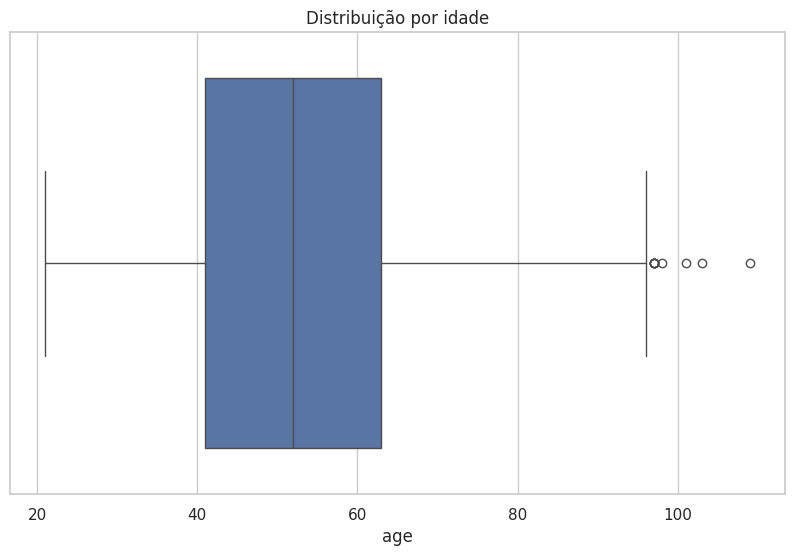

--------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------


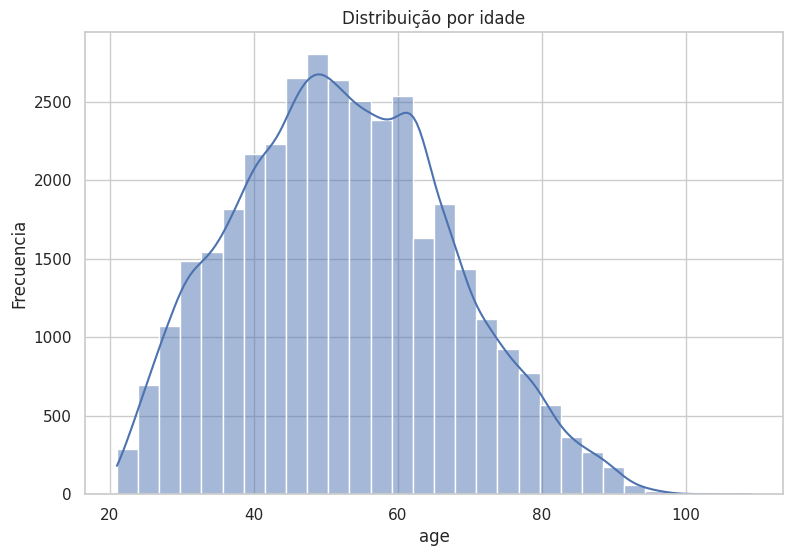

--------------------------------------------------------------------------------------------------------


In [10]:
#Configurar o estilo dos gráficos
sns.set(style='whitegrid')

#Criar um gráfico boxplot para 'age'
plt.figure(figsize=(10,6))
sns.boxplot(x=df['age'])
plt.title('Distribuição por idade')
plt.xlabel('age')
plt.show()
print('--------------------------------------------------------------------------------------------------------')

import plotly.express as px
fig = px.box(df, y="age")
fig.show()
print('--------------------------------------------------------------------------------------------------------')

# Crear un histograma para 'age'
plt.figure(figsize=(9, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribuição por idade')
plt.xlabel('age')
plt.ylabel('Frecuencia')
plt.show()

print('--------------------------------------------------------------------------------------------------------')
import plotly.express as px
fig = px.histogram(df, x="age",
                  title="Distribuição por idade", nbins=1500)
fig.show()

1.  A faixa con maior número de cliente está entre 40 e 64 anos
2. A média de idade é 52.42

In [11]:
# Identificando os outliers

# Calcular Q1 (cuartil 25) y Q3 (cuartil 75) para 'age'
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

# Mostrar los outliers
print("Outliers:")
print(outliers)

# Crear una nueva columna indicando si es un outlier
df['outlier_age'] = np.where((df['age'] < lower_bound) | (df['age'] > upper_bound), True, False)

# Mostrar las primeras filas del DataFrame con la nueva columna
# df.head()



# Visualizar los outliers en un boxplot
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=df['age'])
# plt.title('Boxplot de age com Outliers')
# plt.xlabel('age')
# plt.show()


Outliers:
       user_id  age sex  number_dependents  last_month_salary  \
134        135  109   M                  0                  0   
1275      1276   98   F                  0                950   
2168      2169   97   M                  0               3287   
6585      6586  101   F                  0               2883   
13660    13661   97   F                  0               1500   
14728    14729   97   M                  0               5833   
17247    17248   97   M                  0                  0   
19666    19667   97   M                  0               5158   
26809    26810  103   F                  0                  0   
33062    33063   97   M                  0               1747   

       number_times_delayed_payment_loan_30_59_days  more_90_days_overdue  \
134                                               0                     0   
1275                                              1                     0   
2168                                       

## Variável 'number_dependents'

In [12]:
df['number_dependents'].describe()

count    36000.000000
mean         0.738222
std          1.110608
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         13.000000
Name: number_dependents, dtype: float64

In [13]:
# Percentile 99
threshold_number_dependents = df['number_dependents'].quantile(0.99)
threshold_number_dependents

4.0

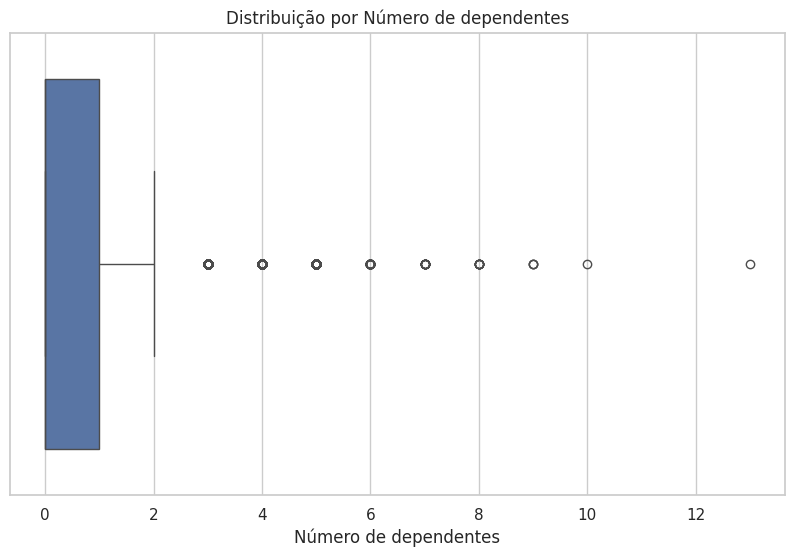

--------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------


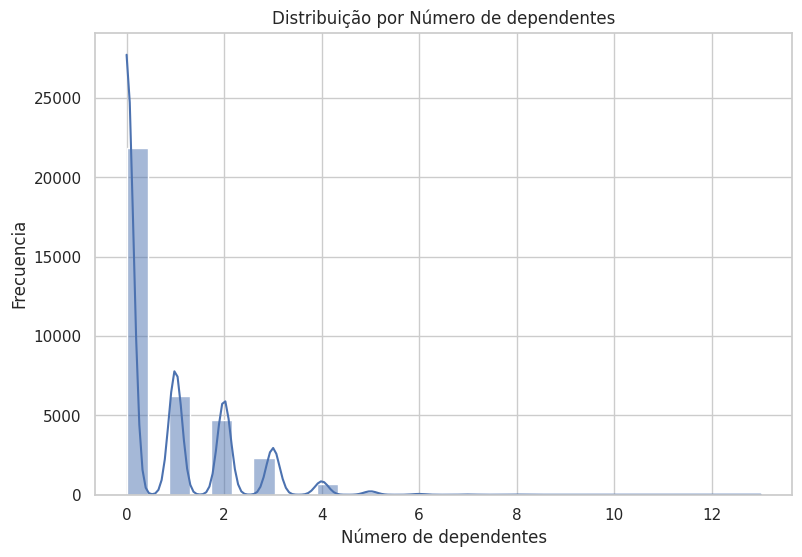

--------------------------------------------------------------------------------------------------------


In [14]:
#Configurar o estilo dos gráficos
sns.set(style='whitegrid')

#Criar um gráfico boxplot para 'number_dependents'
plt.figure(figsize=(10,6))
sns.boxplot(x=df['number_dependents'])
plt.title('Distribuição por Número de dependentes')
plt.xlabel('Número de dependentes')
plt.show()
print('--------------------------------------------------------------------------------------------------------')

import plotly.express as px
fig = px.box(df, y="number_dependents")
fig.show()
print('--------------------------------------------------------------------------------------------------------')

# Crear un histograma para 'number_dependents'
plt.figure(figsize=(9, 6))
sns.histplot(df['number_dependents'], bins=30, kde=True)
plt.title('Distribuição por Número de dependentes')
plt.xlabel('Número de dependentes')
plt.ylabel('Frecuencia')
plt.show()

print('--------------------------------------------------------------------------------------------------------')
import plotly.express as px
fig = px.histogram(df, x="number_dependents",
                  title="Distribuição por Número de dependentes", nbins=1500)
fig.show()

In [15]:
# Identificando os outliers

# Calcular Q1 (cuartil 25) y Q3 (cuartil 75) para 'last_month_salary'
Q1 = df['number_dependents'].quantile(0.25)
Q3 = df['number_dependents'].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = df[(df['number_dependents'] < lower_bound) | (df['number_dependents'] > upper_bound)]

# Mostrar los outliers
print("Outliers:")
print(outliers)

# Crear una nueva columna indicando si es un outlier
df['outlier_number_dependents'] = np.where((df['number_dependents'] < lower_bound) | (df['number_dependents'] > upper_bound), True, False)

# Mostrar las primeras filas del DataFrame con la nueva columna
# df.head()

# Visualizar los outliers en un boxplot
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=df['age'])
# plt.title('Boxplot de age com Outliers')
# plt.xlabel('age')
# plt.show()

Outliers:
       user_id  age sex  number_dependents  last_month_salary  \
41          42   34   M                  4               5800   
67          68   47   M                  3               5560   
83          84   43   F                  3               4000   
84          85   45   M                  3               5666   
87          88   44   M                  3              51140   
...        ...  ...  ..                ...                ...   
35943    35944   48   F                  3               4500   
35949    35950   45   F                  4               6400   
35953    35954   42   M                  3               9417   
35959    35960   49   M                  3               9500   
35967    35968   28   M                  4               3000   

       number_times_delayed_payment_loan_30_59_days  more_90_days_overdue  \
41                                                1                     0   
67                                                0    

In [16]:
# Identificando os outliers

# Calcular Q1 (cuartil 25) y Q3 (cuartil 75) para 'age'
Q1 = df['number_dependents'].quantile(0.25)
Q3 = df['number_dependents'].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = df[(df['number_dependents'] < lower_bound) | (df['number_dependents'] > upper_bound)]

# Mostrar los outliers
print("Outliers:")
print(outliers)

# Crear una nueva columna indicando si es un outlier
df['outlier_number_dependents'] = np.where((df['number_dependents'] < lower_bound) | (df['number_dependents'] > upper_bound), True, False)

# Mostrar las primeras filas del DataFrame con la nueva columna
# df.head()


Outliers:
       user_id  age sex  number_dependents  last_month_salary  \
41          42   34   M                  4               5800   
67          68   47   M                  3               5560   
83          84   43   F                  3               4000   
84          85   45   M                  3               5666   
87          88   44   M                  3              51140   
...        ...  ...  ..                ...                ...   
35943    35944   48   F                  3               4500   
35949    35950   45   F                  4               6400   
35953    35954   42   M                  3               9417   
35959    35960   49   M                  3               9500   
35967    35968   28   M                  4               3000   

       number_times_delayed_payment_loan_30_59_days  more_90_days_overdue  \
41                                                1                     0   
67                                                0    

## Variável 'last_month_salary'

In [17]:
df['last_month_salary'].describe()

count    3.600000e+04
mean     5.340227e+03
std      1.189699e+04
min      0.000000e+00
25%      1.500000e+03
50%      4.370000e+03
75%      7.416000e+03
max      1.560100e+06
Name: last_month_salary, dtype: float64

In [18]:
# Percentile 99
threshold_salario = df['last_month_salary'].quantile(0.99)
threshold_salario

23250.070000000014

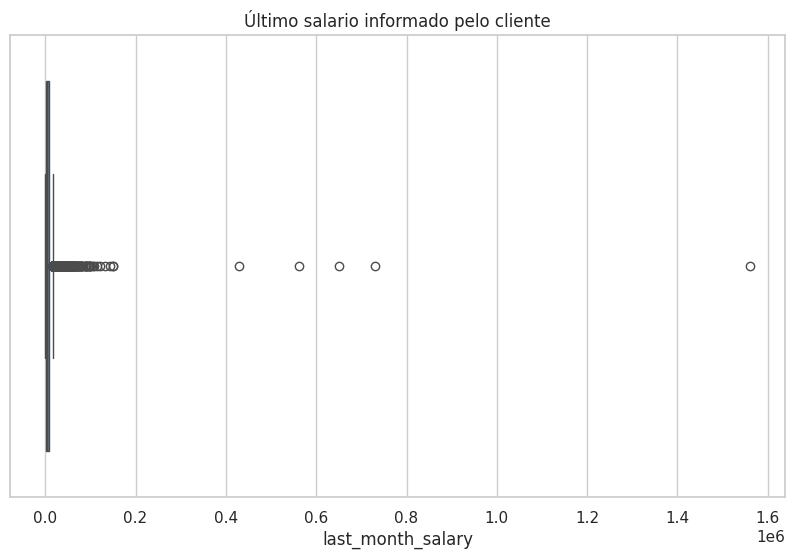

--------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------


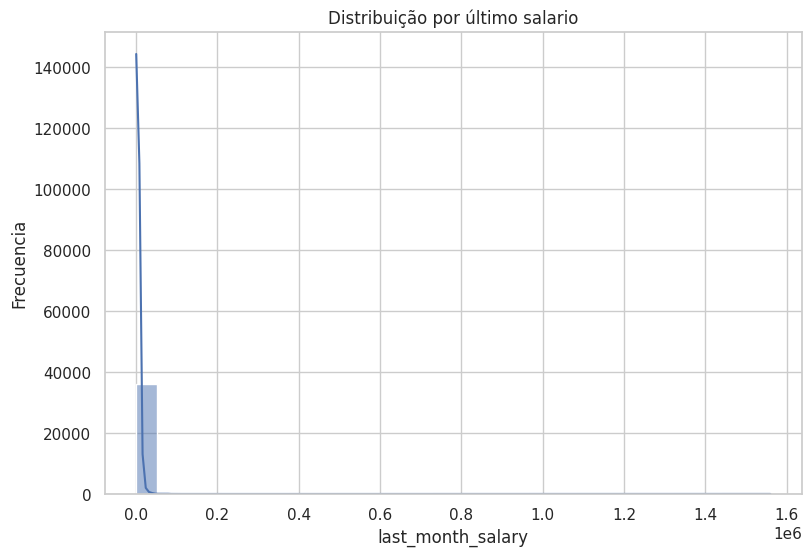

--------------------------------------------------------------------------------------------------------


In [19]:
#Configurar o estilo dos gráficos
sns.set(style='whitegrid')

#Criar um gráfico boxplot para 'last_month_salary'
plt.figure(figsize=(10,6))
sns.boxplot(x=df['last_month_salary'])
plt.title('Último salario informado pelo cliente')
plt.xlabel('last_month_salary')
plt.show()
print('--------------------------------------------------------------------------------------------------------')

import plotly.express as px
fig = px.box(df, y="last_month_salary")
fig.show()
print('--------------------------------------------------------------------------------------------------------')

# Crear un histograma para 'last_month_salary'
plt.figure(figsize=(9, 6))
sns.histplot(df['last_month_salary'], bins=30, kde=True)
plt.title('Distribuição por último salario')
plt.xlabel('last_month_salary')
plt.ylabel('Frecuencia')
plt.show()

print('--------------------------------------------------------------------------------------------------------')

import plotly.express as px
fig = px.histogram(df, x="last_month_salary",
                  title="Distribuição de clientes por último salario", nbins=1500)
fig.show()

In [20]:
# Identificando os outliers

# Calcular Q1 (cuartil 25) y Q3 (cuartil 75) para 'last_month_salary'
Q1 = df['last_month_salary'].quantile(0.25)
Q3 = df['last_month_salary'].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Limites: ", lower_bound, upper_bound)

# Identificar los outliers
outliers = df[(df['last_month_salary'] < lower_bound) | (df['last_month_salary'] > upper_bound)]

# Mostrar los outliers
print("Outliers:")
print(outliers)

# Crear una nueva columna indicando si es un outlier
df['outlier_last_month_salary'] = np.where((df['last_month_salary'] < lower_bound) | (df['last_month_salary'] > upper_bound), True, False)

# Mostrar las primeras filas del DataFrame con la nueva columna
# df.head()

# Visualizar los outliers en un boxplot
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=df['age'])
# plt.title('Boxplot de age com Outliers')
# plt.xlabel('age')
# plt.show()

Limites:  -7374.0 16290.0
Outliers:
       user_id  age sex  number_dependents  last_month_salary  \
87          88   44   M                  3              51140   
121        122   64   M                  0              32000   
140        141   64   F                  0              30452   
163        164   62   F                  3              17750   
173        174   51   M                  1              24020   
...        ...  ...  ..                ...                ...   
35703    35704   73   F                  2              16500   
35714    35715   64   M                  0              24500   
35757    35758   77   F                  0              17251   
35927    35928   48   M                  2              19000   
35936    35937   65   M                  2              21600   

       number_times_delayed_payment_loan_30_59_days  more_90_days_overdue  \
87                                                0                     2   
121                          

## Variável 'more_90_days_overdue'

In [21]:
df['more_90_days_overdue'].describe()

count    36000.000000
mean         0.260806
std          4.121365
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         98.000000
Name: more_90_days_overdue, dtype: float64

In [22]:
# Percentile 99
threshold_more_90_days_overdue = df['more_90_days_overdue'].quantile(0.99)
threshold_more_90_days_overdue

3.0

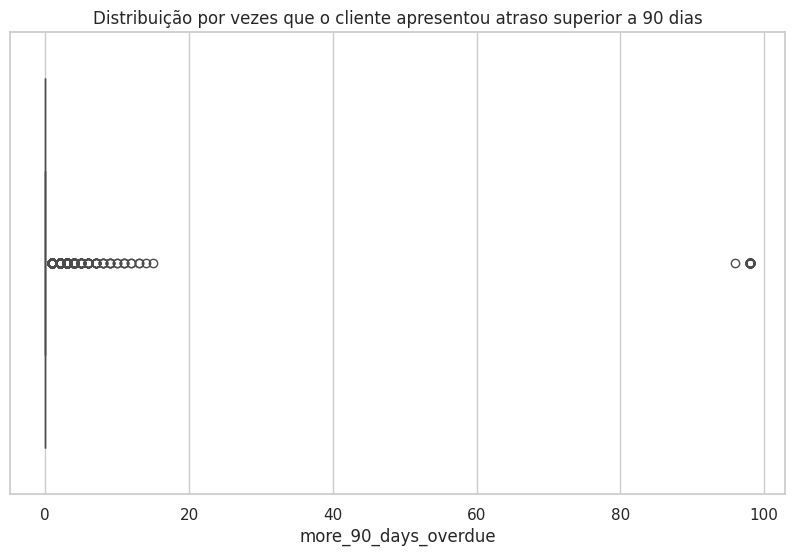

--------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------


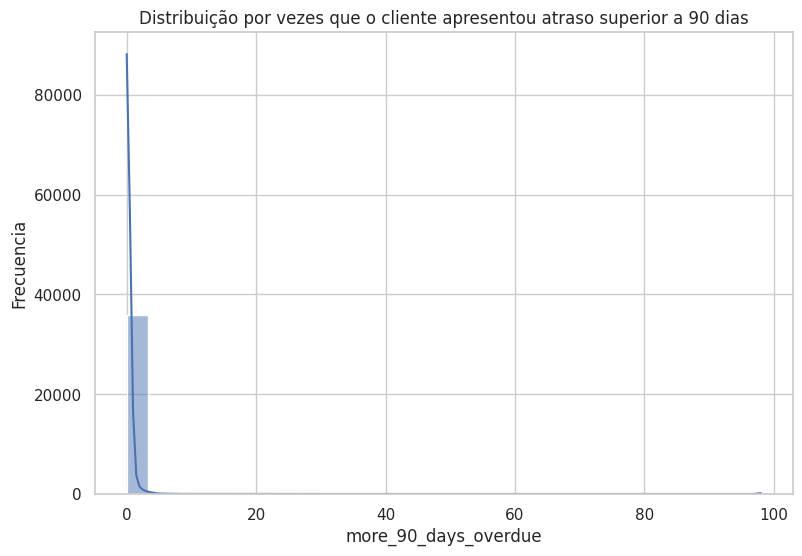

--------------------------------------------------------------------------------------------------------


In [23]:
#Configurar o estilo dos gráficos
sns.set(style='whitegrid')

#Criar um gráfico boxplot para 'more_90_days_overdue'
plt.figure(figsize=(10,6))
sns.boxplot(x=df['more_90_days_overdue'])
plt.title('Distribuição por vezes que o cliente apresentou atraso superior a 90 dias')
plt.xlabel('more_90_days_overdue')
plt.show()
print('--------------------------------------------------------------------------------------------------------')

import plotly.express as px
fig = px.box(df, y="more_90_days_overdue")
fig.show()
print('--------------------------------------------------------------------------------------------------------')

# Crear un histograma para 'more_90_days_overdue'
plt.figure(figsize=(9, 6))
sns.histplot(df['more_90_days_overdue'], bins=30, kde=True)
plt.title('Distribuição por vezes que o cliente apresentou atraso superior a 90 dias')
plt.xlabel('more_90_days_overdue')
plt.ylabel('Frecuencia')
plt.show()

print('--------------------------------------------------------------------------------------------------------')
import plotly.express as px
fig = px.histogram(df, x="more_90_days_overdue",
                  title="Distribuição por vezes que o cliente apresentou atraso superior a 90 dias", nbins=100)
fig.show()

In [24]:
# Identificando os outliers

# Calcular Q1 (cuartil 25) y Q3 (cuartil 75) para 'more_90_days_overdue'
Q1 = df['more_90_days_overdue'].quantile(0.25)
Q3 = df['more_90_days_overdue'].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = df[(df['more_90_days_overdue'] < lower_bound) | (df['more_90_days_overdue'] > upper_bound)]

# Mostrar los outliers
print("Outliers:")
print(outliers)

# Crear una nueva columna indicando si es un outlier
df['outlier_more_90_days_overdue'] = np.where((df['more_90_days_overdue'] < lower_bound) | (df['more_90_days_overdue'] > upper_bound), True, False)

# Mostrar las primeras filas del DataFrame con la nueva columna
# df.head()

# Visualizar los outliers en un boxplot
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=df['age'])
# plt.title('Boxplot de age com Outliers')
# plt.xlabel('age')
# plt.show()

Outliers:
       user_id  age sex  number_dependents  last_month_salary  \
7            8   55   M                  0              15658   
13          14   41   M                  0              10749   
22          23   41   M                  0                  0   
28          29   43   M                  0               5833   
87          88   44   M                  3              51140   
...        ...  ...  ..                ...                ...   
35947    35948   38   M                  0                  0   
35976    35977   71   M                  0               7978   
35979    35980   28   M                  0               1000   
35995    35996   68   F                  0              10833   
35999    36000   28   M                  0               3500   

       number_times_delayed_payment_loan_30_59_days  more_90_days_overdue  \
7                                                 0                     1   
13                                                0    

## Variável 'using_lines_not_secured_personal_assets_pct'

In [25]:
df['using_lines_not_secured_personal_assets_pct'].describe()

count    3.600000e+04
mean     5.807040e+02
std      2.234071e+04
min      0.000000e+00
25%      2.950000e+00
50%      1.497000e+01
75%      5.485000e+01
max      2.200000e+06
Name: using_lines_not_secured_personal_assets_pct, dtype: float64

In [26]:
# Percentile 99
threshold_using_lines_not_secured_personal_assets_pct = df['using_lines_not_secured_personal_assets_pct'].quantile(0.99)
threshold_using_lines_not_secured_personal_assets_pct

109.12030000000007

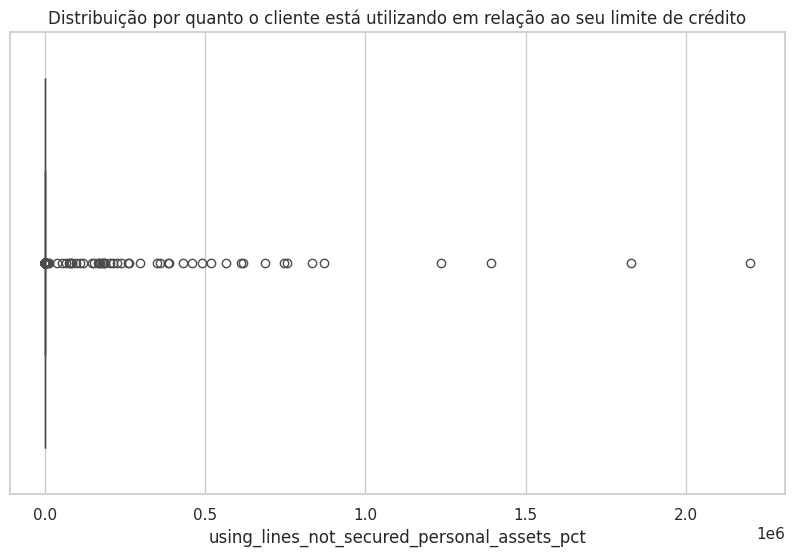

--------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------


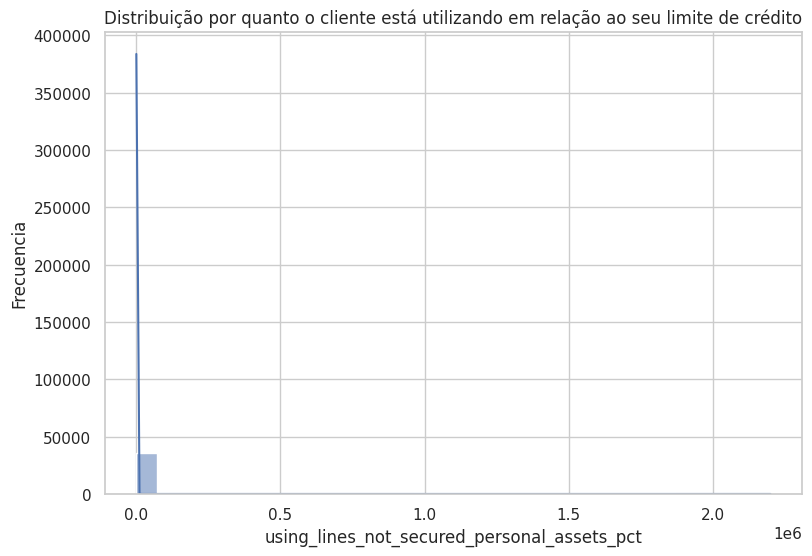

--------------------------------------------------------------------------------------------------------


In [27]:
#Configurar o estilo dos gráficos
sns.set(style='whitegrid')

#Criar um gráfico boxplot para 'using_lines_not_secured_personal_assets_pct'
plt.figure(figsize=(10,6))
sns.boxplot(x=df['using_lines_not_secured_personal_assets_pct'])
plt.title('Distribuição por quanto o cliente está utilizando em relação ao seu limite de crédito')
plt.xlabel('using_lines_not_secured_personal_assets_pct')
plt.show()
print('--------------------------------------------------------------------------------------------------------')

import plotly.express as px
fig = px.box(df, y="using_lines_not_secured_personal_assets_pct")
fig.show()
print('--------------------------------------------------------------------------------------------------------')

# Crear un histograma para 'using_lines_not_secured_personal_assets_pct'
plt.figure(figsize=(9, 6))
sns.histplot(df['using_lines_not_secured_personal_assets_pct'], bins=30, kde=True)
plt.title('Distribuição por quanto o cliente está utilizando em relação ao seu limite de crédito')
plt.xlabel('using_lines_not_secured_personal_assets_pct')
plt.ylabel('Frecuencia')
plt.show()

print('--------------------------------------------------------------------------------------------------------')
import plotly.express as px
fig = px.histogram(df, x="using_lines_not_secured_personal_assets_pct",
                  title="Distribuição por quanto o cliente está utilizando em relação ao seu limite de crédito", nbins=1500)
fig.show()

In [28]:
# Identificando os outliers

# Calcular Q1 (cuartil 25) y Q3 (cuartil 75) para 'age'
Q1 = df['using_lines_not_secured_personal_assets_pct'].quantile(0.25)
Q3 = df['using_lines_not_secured_personal_assets_pct'].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = df[(df['using_lines_not_secured_personal_assets_pct'] < lower_bound) | (df['using_lines_not_secured_personal_assets_pct'] > upper_bound)]

# Mostrar los outliers
print("Outliers:")
print(outliers)

# Crear una nueva columna indicando si es un outlier
df['outlier_using_lines_not_secured_personal_assets_pct'] = np.where((df['using_lines_not_secured_personal_assets_pct'] < lower_bound) | (df['using_lines_not_secured_personal_assets_pct'] > upper_bound), True, False)

# Mostrar las primeras filas del DataFrame con la nueva columna
# df.head()

# Visualizar los outliers en un boxplot
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=df['age'])
# plt.title('Boxplot de age com Outliers')
# plt.xlabel('age')
# plt.show()

Outliers:
       user_id  age sex  number_dependents  last_month_salary  \
395        396   43   F                  2               5000   
505        506   37   F                  4              11666   
721        722   29   M                  0                  0   
785        786   40   F                  0                  0   
1379      1380   63   M                  0                  0   
...        ...  ...  ..                ...                ...   
34868    34869   39   M                  0               6380   
34897    34898   64   F                  0                  0   
34907    34908   41   M                  0               8000   
35084    35085   59   M                  2              10500   
35929    35930   38   F                  4              10000   

       number_times_delayed_payment_loan_30_59_days  more_90_days_overdue  \
395                                               0                     0   
505                                               0    

## Variável 'number_times_delayed_payment_loan_30_59_days'

In [29]:
df['number_times_delayed_payment_loan_30_59_days'].describe()

count    36000.000000
mean         0.419278
std          4.144020
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         98.000000
Name: number_times_delayed_payment_loan_30_59_days, dtype: float64

In [30]:
# Percentile 99
threshold_number_times_delayed_payment_loan_30_59_days = df['number_times_delayed_payment_loan_30_59_days'].quantile(0.99)
threshold_number_times_delayed_payment_loan_30_59_days

4.0

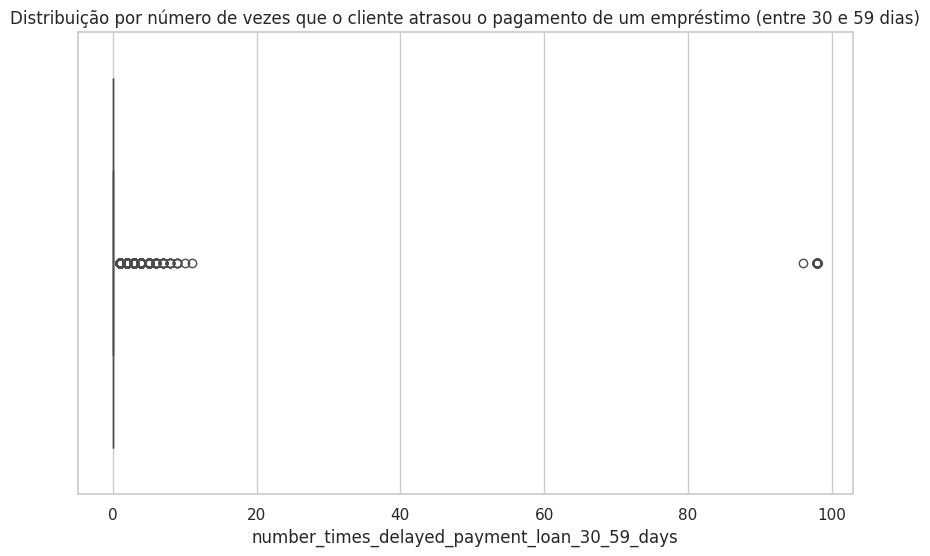

--------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------


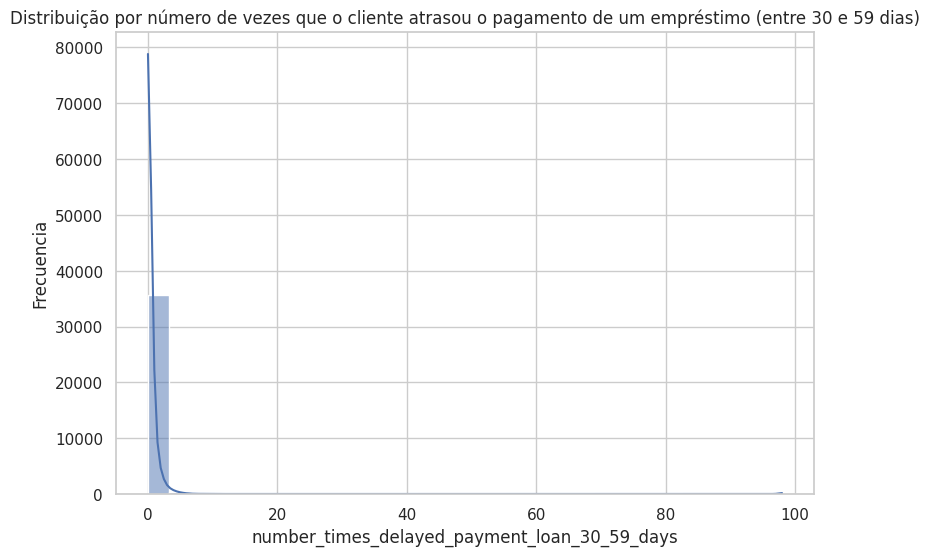

--------------------------------------------------------------------------------------------------------


In [31]:
#Configurar o estilo dos gráficos
sns.set(style='whitegrid')

#Criar um gráfico boxplot para 'number_times_delayed_payment_loan_30_59_days'
plt.figure(figsize=(10,6))
sns.boxplot(x=df['number_times_delayed_payment_loan_30_59_days'])
plt.title('Distribuição por número de vezes que o cliente atrasou o pagamento de um empréstimo (entre 30 e 59 dias)')
plt.xlabel('number_times_delayed_payment_loan_30_59_days')
plt.show()
print('--------------------------------------------------------------------------------------------------------')


import plotly.express as px
fig = px.box(df, y="number_times_delayed_payment_loan_30_59_days")
fig.show()
print('--------------------------------------------------------------------------------------------------------')

# Crear un histograma para 'number_times_delayed_payment_loan_30_59_days'
plt.figure(figsize=(9, 6))
sns.histplot(df['number_times_delayed_payment_loan_30_59_days'], bins=30, kde=True)
plt.title('Distribuição por número de vezes que o cliente atrasou o pagamento de um empréstimo (entre 30 e 59 dias)')
plt.xlabel('number_times_delayed_payment_loan_30_59_days')
plt.ylabel('Frecuencia')
plt.show()

print('--------------------------------------------------------------------------------------------------------')
import plotly.express as px
fig = px.histogram(df, x="number_times_delayed_payment_loan_30_59_days",
                  title="Distribuição por número de vezes que o cliente atrasou o pagamento de um empréstimo (entre 30 e 59 dias)", nbins=1500)
fig.show()

In [32]:
# Identificando os outliers

# Calcular Q1 (cuartil 25) y Q3 (cuartil 75) para 'age'
Q1 = df['number_times_delayed_payment_loan_30_59_days'].quantile(0.25)
Q3 = df['number_times_delayed_payment_loan_30_59_days'].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = df[(df['number_times_delayed_payment_loan_30_59_days'] < lower_bound) | (df['number_times_delayed_payment_loan_30_59_days'] > upper_bound)]

# Mostrar los outliers
print("Outliers:")
print(outliers)

# Crear una nueva columna indicando si es un outlier
df['outlier_number_times_delayed_payment_loan_30_59_days'] = np.where((df['number_times_delayed_payment_loan_30_59_days'] < lower_bound) | (df['number_times_delayed_payment_loan_30_59_days'] > upper_bound), True, False)

# Mostrar las primeras filas del DataFrame con la nueva columna
# df.head()

# Visualizar los outliers en un boxplot
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=df['age'])
# plt.title('Boxplot de age com Outliers')
# plt.xlabel('age')
# plt.show()

Outliers:
       user_id  age sex  number_dependents  last_month_salary  \
6            7   76   M                  0               1700   
8            9   41   M                  0               8441   
10          11   56   M                  1               6400   
14          15   64   M                  0               7083   
28          29   43   M                  0               5833   
...        ...  ...  ..                ...                ...   
35980    35981   63   F                  0               6000   
35983    35984   42   F                  0               1200   
35985    35986   48   F                  0                  0   
35995    35996   68   F                  0              10833   
35998    35999   64   F                  0               5045   

       number_times_delayed_payment_loan_30_59_days  more_90_days_overdue  \
6                                                 1                     0   
8                                                 1    

## Variável 'debt_ratio_pct'

In [33]:
df['debt_ratio_pct'].describe()

count    3.600000e+04
mean     3.515801e+04
std      2.011635e+05
min      0.000000e+00
25%      1.763000e+01
50%      3.662000e+01
75%      8.735250e+01
max      3.070010e+07
Name: debt_ratio_pct, dtype: float64

In [34]:
# Percentile 99
threshold_debt_ratio_pct = df['debt_ratio_pct'].quantile(0.99)
threshold_debt_ratio_pct

492109.00000000186

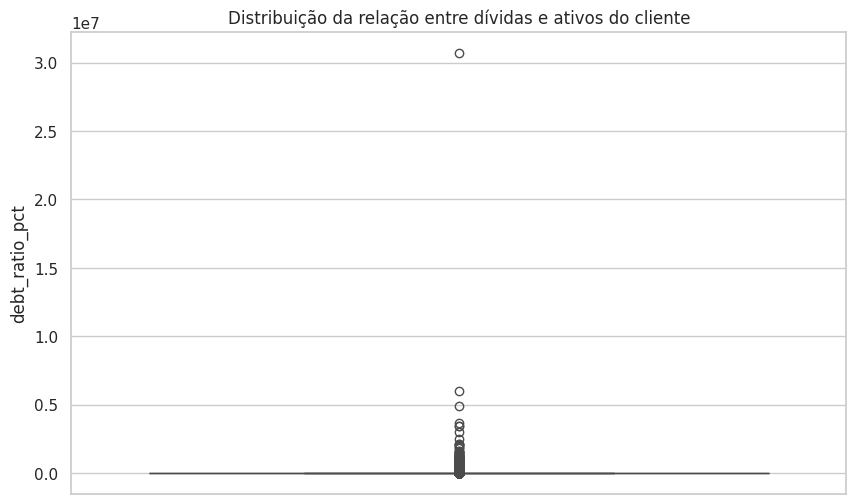

--------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------


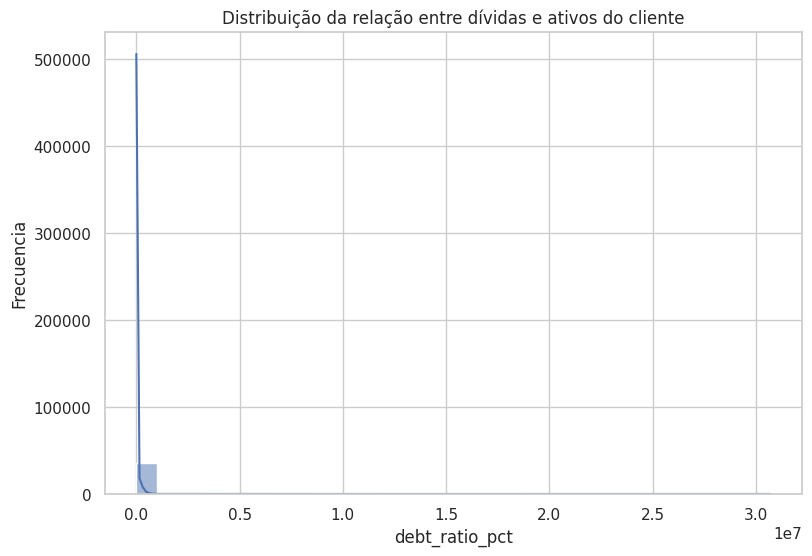

--------------------------------------------------------------------------------------------------------


In [35]:
#Configurar o estilo dos gráficos
sns.set(style='whitegrid')

#Criar um gráfico boxplot para 'debt_ratio_pct'
plt.figure(figsize=(10,6))
sns.boxplot(y=df['debt_ratio_pct'])
plt.title('Distribuição da relação entre dívidas e ativos do cliente')
plt.ylabel('debt_ratio_pct')
plt.show()
print('--------------------------------------------------------------------------------------------------------')

import plotly.express as px
fig = px.box(df, y="debt_ratio_pct")
fig.show()
print('--------------------------------------------------------------------------------------------------------')

# Crear un histograma para 'debt_ratio_pct'
plt.figure(figsize=(9, 6))
sns.histplot(df['debt_ratio_pct'], bins=30, kde=True)
plt.title('Distribuição da relação entre dívidas e ativos do cliente')
plt.xlabel('debt_ratio_pct')
plt.ylabel('Frecuencia')
plt.show()

print('--------------------------------------------------------------------------------------------------------')
import plotly.express as px
fig = px.histogram(df, x="debt_ratio_pct",
                  title="Distribuição da relação entre dívidas e ativos do cliente", nbins=1500)
fig.show()

In [36]:
# Identificando os outliers

# Calcular Q1 (cuartil 25) y Q3 (cuartil 75) para 'age'
Q1 = df['debt_ratio_pct'].quantile(0.25)
Q3 = df['debt_ratio_pct'].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = df[(df['debt_ratio_pct'] < lower_bound) | (df['debt_ratio_pct'] > upper_bound)]

# Mostrar los outliers
print("Outliers:")
print(outliers)

# Crear una nueva columna indicando si es un outlier
df['outlier_debt_ratio_pct'] = np.where((df['debt_ratio_pct'] < lower_bound) | (df['debt_ratio_pct'] > upper_bound), True, False)

# Mostrar las primeras filas del DataFrame con la nueva columna
# df.head()

# Visualizar los outliers en un boxplot
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=df['age'])
# plt.title('Boxplot de age com Outliers')
# plt.xlabel('age')
# plt.show()

Outliers:
       user_id  age sex  number_dependents  last_month_salary  \
9           10   49   F                  0                200   
11          12   77   M                  0                  0   
18          19   51   F                  0                  0   
19          20   42   M                  0                  0   
21          22   75   M                  0                  0   
...        ...  ...  ..                ...                ...   
35981    35982   70   M                  0                  0   
35982    35983   51   M                  0                  0   
35985    35986   48   F                  0                  0   
35987    35988   75   M                  0                  0   
35989    35990   27   F                  0                  0   

       number_times_delayed_payment_loan_30_59_days  more_90_days_overdue  \
9                                                 0                     0   
11                                                0    

## Variavél 'number_times_delayed_payment_loan_60_89_days'

In [37]:
df['number_times_delayed_payment_loan_60_89_days'].describe()

count    36000.000000
mean         0.237861
std          4.105515
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         98.000000
Name: number_times_delayed_payment_loan_60_89_days, dtype: float64

In [38]:
# Percentile 99
threshold_number_times_delayed_payment_loan_60_89_days = df['number_times_delayed_payment_loan_60_89_days'].quantile(0.99)
threshold_number_times_delayed_payment_loan_60_89_days

2.0

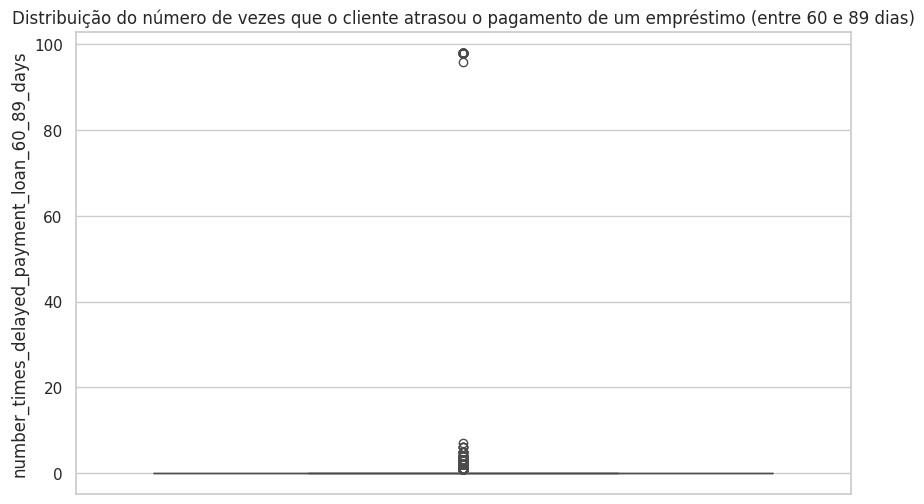

--------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------


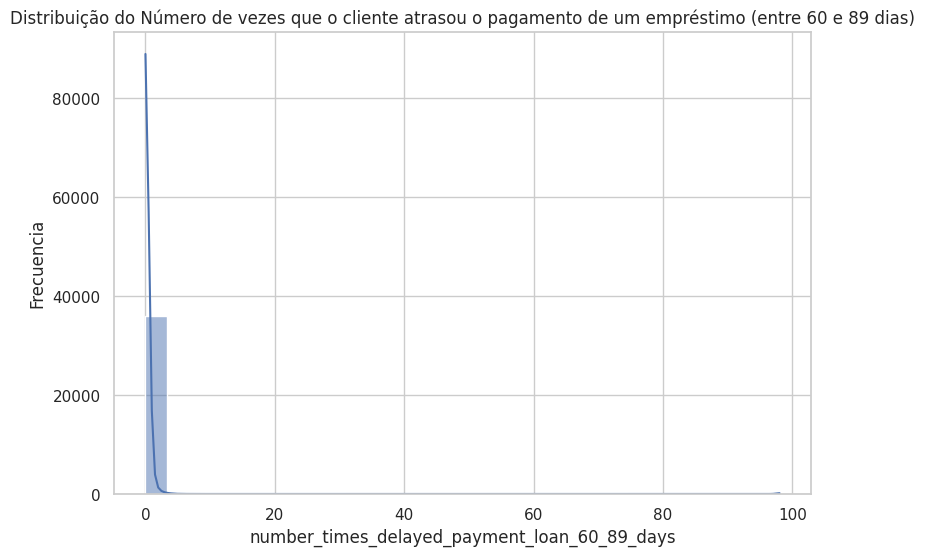

--------------------------------------------------------------------------------------------------------


In [39]:
#Configurar o estilo dos gráficos
sns.set(style='whitegrid')

#Criar um gráfico boxplot para 'number_times_delayed_payment_loan_60_89_days'
plt.figure(figsize=(10,6))
sns.boxplot(y=df['number_times_delayed_payment_loan_60_89_days'])
plt.title('Distribuição do número de vezes que o cliente atrasou o pagamento de um empréstimo (entre 60 e 89 dias)')
plt.ylabel('number_times_delayed_payment_loan_60_89_days')
plt.show()
print('--------------------------------------------------------------------------------------------------------')

import plotly.express as px
fig = px.box(df, y="number_times_delayed_payment_loan_60_89_days")
fig.show()
print('--------------------------------------------------------------------------------------------------------')

# Crear un histograma para 'number_times_delayed_payment_loan_60_89_days'
plt.figure(figsize=(9, 6))
sns.histplot(df['number_times_delayed_payment_loan_60_89_days'], bins=30, kde=True)
plt.title('Distribuição do Número de vezes que o cliente atrasou o pagamento de um empréstimo (entre 60 e 89 dias)')
plt.xlabel('number_times_delayed_payment_loan_60_89_days')
plt.ylabel('Frecuencia')
plt.show()

print('--------------------------------------------------------------------------------------------------------')
import plotly.express as px
fig = px.histogram(df, x="number_times_delayed_payment_loan_60_89_days",
                  title="Distribuição do Número de vezes que o cliente atrasou o pagamento de um empréstimo (entre 60 e 89 dias)", nbins=1500)
fig.show()

In [40]:
# Identificando os outliers

# Calcular Q1 (cuartil 25) y Q3 (cuartil 75) para 'age'
Q1 = df['number_times_delayed_payment_loan_60_89_days'].quantile(0.25)
Q3 = df['number_times_delayed_payment_loan_60_89_days'].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = df[(df['number_times_delayed_payment_loan_60_89_days'] < lower_bound) | (df['number_times_delayed_payment_loan_60_89_days'] > upper_bound)]

# Mostrar los outliers
print("Outliers:")
print(outliers)

# Crear una nueva columna indicando si es un outlier
df['outlier_number_times_delayed_payment_loan_60_89_days'] = np.where((df['number_times_delayed_payment_loan_60_89_days'] < lower_bound) | (df['number_times_delayed_payment_loan_60_89_days'] > upper_bound), True, False)

# Mostrar las primeras filas del DataFrame con la nueva columna
# df.head()

# Visualizar los outliers en un boxplot
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=df['age'])
# plt.title('Boxplot de age com Outliers')
# plt.xlabel('age')
# plt.show()

Outliers:
       user_id  age sex  number_dependents  last_month_salary  \
2            3   54   M                  0               5900   
28          29   43   M                  0               5833   
40          41   62   F                  0               6500   
119        120   39   M                  0                  0   
151        152   45   M                  0               2383   
...        ...  ...  ..                ...                ...   
35910    35911   39   M                  2               4300   
35911    35912   57   M                  3               4200   
35944    35945   26   M                  1               5400   
35983    35984   42   F                  0               1200   
35989    35990   27   F                  0                  0   

       number_times_delayed_payment_loan_30_59_days  more_90_days_overdue  \
2                                                 0                     0   
28                                                4    

## Variavél 'default_flag'

In [41]:
df['default_flag'].describe()

count    36000.000000
mean         0.018972
std          0.136429
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default_flag, dtype: float64

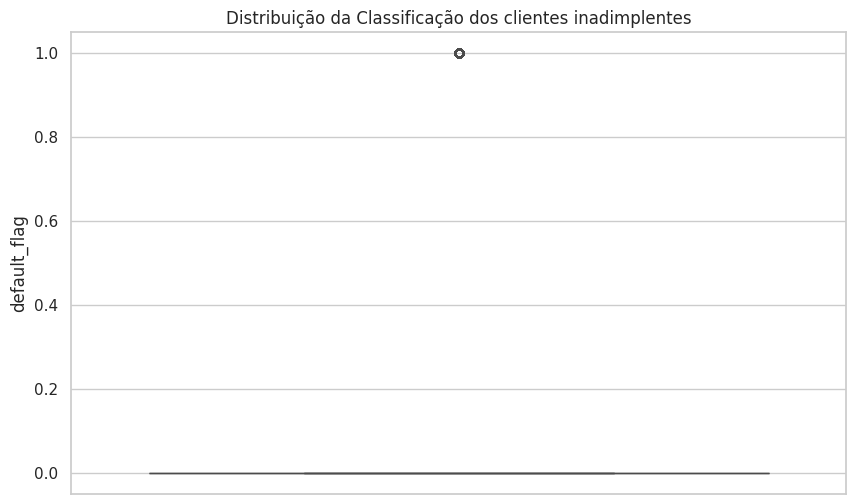

--------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------


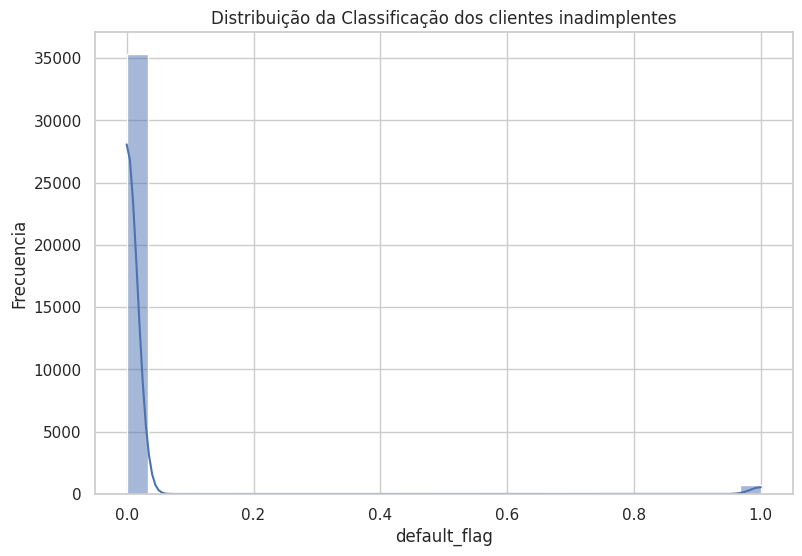

--------------------------------------------------------------------------------------------------------


In [42]:
#Configurar o estilo dos gráficos
sns.set(style='whitegrid')

#Criar um gráfico boxplot para 'default_flag'
plt.figure(figsize=(10,6))
sns.boxplot(y=df['default_flag'])
plt.title('Distribuição da Classificação dos clientes inadimplentes')
plt.ylabel('default_flag')
plt.show()
print('--------------------------------------------------------------------------------------------------------')

import plotly.express as px
fig = px.box(df, y="default_flag")
fig.show()
print('--------------------------------------------------------------------------------------------------------')

# Crear un histograma para 'default_flag'
plt.figure(figsize=(9, 6))
sns.histplot(df['default_flag'], bins=30, kde=True)
plt.title('Distribuição da Classificação dos clientes inadimplentes')
plt.xlabel('default_flag')
plt.ylabel('Frecuencia')
plt.show()

print('--------------------------------------------------------------------------------------------------------')
import plotly.express as px
fig = px.histogram(df, x="default_flag",
                  title="Distribuição da Classificação dos clientes inadimplentes", nbins=1500)
fig.show()

In [43]:
# Identificando os outliers

# Calcular Q1 (cuartil 25) y Q3 (cuartil 75) para 'age'
Q1 = df['default_flag'].quantile(0.25)
Q3 = df['default_flag'].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = df[(df['default_flag'] < lower_bound) | (df['default_flag'] > upper_bound)]

# Mostrar los outliers
print("Outliers:")
print(outliers)

# Crear una nueva columna indicando si es un outlier
df['outlier_default_flag'] = np.where((df['default_flag'] < lower_bound) | (df['default_flag'] > upper_bound), True, False)

# Mostrar las primeras filas del DataFrame con la nueva columna
# df.head()

# Visualizar los outliers en un boxplot
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=df['age'])
# plt.title('Boxplot de age com Outliers')
# plt.xlabel('age')
# plt.show()


Outliers:
       user_id  age sex  number_dependents  last_month_salary  \
119        120   39   M                  0                  0   
173        174   51   M                  1              24020   
268        269   38   M                  1               8000   
306        307   31   M                  1               4150   
330        331   27   M                  0               1280   
...        ...  ...  ..                ...                ...   
35450    35451   67   M                  0               6215   
35552    35553   33   F                  0               6500   
35851    35852   56   M                  0               3833   
35896    35897   28   M                  0                  0   
35911    35912   57   M                  3               4200   

       number_times_delayed_payment_loan_30_59_days  more_90_days_overdue  \
119                                              98                    98   
173                                               2    

## Variável 'total_loans'

In [44]:
df['total_loans'].describe()

count    36000.000000
mean         8.481528
std          5.181148
min          0.000000
25%          5.000000
50%          8.000000
75%         11.000000
max         57.000000
Name: total_loans, dtype: float64

In [45]:
# Percentile 99
threshold_total_loans = df['total_loans'].quantile(0.99)
threshold_total_loans

25.0

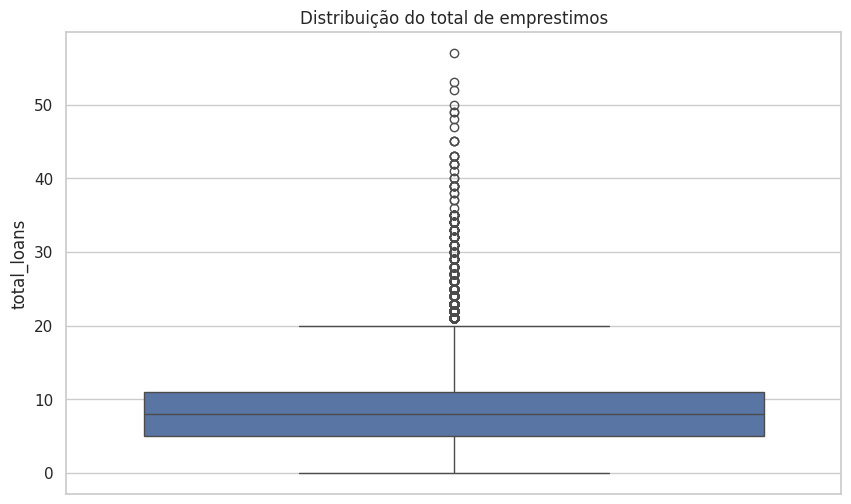

--------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------


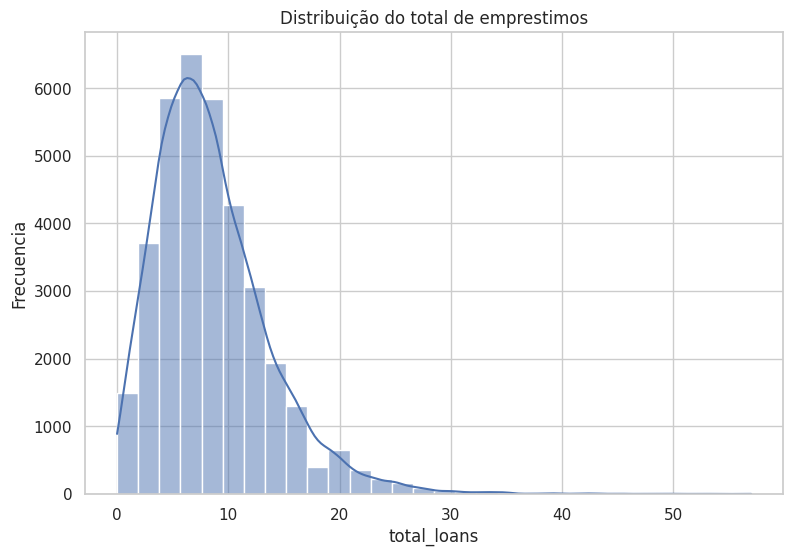

--------------------------------------------------------------------------------------------------------


In [46]:
#Configurar o estilo dos gráficos
sns.set(style='whitegrid')

#Criar um gráfico boxplot para 'total_loans'
plt.figure(figsize=(10,6))
sns.boxplot(y=df['total_loans'])
plt.title('Distribuição do total de emprestimos')
plt.ylabel('total_loans')
plt.show()

print('--------------------------------------------------------------------------------------------------------')
import plotly.express as px
fig = px.box(df, y="total_loans")
fig.show()

print('--------------------------------------------------------------------------------------------------------')
# Crear un histograma para 'total_loans'
plt.figure(figsize=(9, 6))
sns.histplot(df['total_loans'], bins=30, kde=True)
plt.title('Distribuição do total de emprestimos')
plt.xlabel('total_loans')
plt.ylabel('Frecuencia')
plt.show()

print('--------------------------------------------------------------------------------------------------------')
import plotly.express as px
fig = px.histogram(df, x="total_loans",
                  title="Distribuição do total de emprestimos", nbins=1500)
fig.show()

In [47]:
# Identificando os outliers

# Calcular Q1 (cuartil 25) y Q3 (cuartil 75) para 'age'
Q1 = df['count_loan_real_estate'].quantile(0.25)
Q3 = df['count_loan_real_estate'].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = df[(df['count_loan_real_estate'] < lower_bound) | (df['count_loan_real_estate'] > upper_bound)]

# Mostrar los outliers
print("Outliers:")
print(outliers)

# Crear una nueva columna indicando si es un outlier
df['outlier_count_loan_real_estate'] = np.where((df['count_loan_real_estate'] < lower_bound) | (df['count_loan_real_estate'] > upper_bound), True, False)

# Mostrar las primeras filas del DataFrame con la nueva columna
# df.head()

# Visualizar los outliers en un boxplot
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=df['age'])
# plt.title('Boxplot de age com Outliers')
# plt.xlabel('age')
# plt.show()


Outliers:
       user_id  age sex  number_dependents  last_month_salary  \
328        329   33   M                  0              11372   
404        405   69   M                  0                  0   
657        658   58   F                  0              12000   
869        870   49   F                  0              16765   
1232      1233   83   F                  0              19867   
...        ...  ...  ..                ...                ...   
35089    35090   41   F                  0              10500   
35353    35354   52   M                  1              10500   
35560    35561   55   F                  0                  0   
35568    35569   50   M                  2              14916   
35649    35650   40   F                  0                  0   

       number_times_delayed_payment_loan_30_59_days  more_90_days_overdue  \
328                                               0                     0   
404                                               0    

## Analisando distribuição das variáveis

In [48]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Ler um arquivo CSV
df = pd.read_csv('/content/drive/MyDrive/Projeto3-Risco-Relativo/dataset_banco_v3.csv')

In [49]:
fig = make_subplots(rows=4, cols=4)

trace0 = go.Histogram(x=df.age, nbinsx=10, name="Idade")
trace1 = go.Histogram(x=df.number_dependents, nbinsx=10, name='Número de dependentes')
trace2 = go.Histogram(x=df.last_month_salary, nbinsx=6, name='Último salário mensal ')
trace3 = go.Histogram(x=df.more_90_days_overdue, nbinsx=10, name='atraso superior a 90 dias')
trace4 = go.Histogram(x=df.using_lines_not_secured_personal_assets, nbinsx=10, name='Quanto o cliente está utilizando em relação ao seu limite de crédito')
trace5 = go.Histogram(x=df.number_times_delayed_payment_loan_30_59_days, nbinsx=10, name='atrasou entre 30 e 59 dias')
trace6 = go.Histogram(x=df.debt_ratio, nbinsx=10, name='Taxa de endividamento')
trace7 = go.Histogram(x=df.number_times_delayed_payment_loan_60_89_days, nbinsx=6, name='atraso entre 60 e 89 dias')
trace8 = go.Histogram(x=df.default_flag, nbinsx=4, name='inadimplência')
trace9 = go.Histogram(x=df.total_loans, nbinsx=10, name='Total de empréstimos')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 1, 3)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)
fig.append_trace(trace5, 2, 3)
fig.append_trace(trace6, 3, 1)
fig.append_trace(trace7, 3, 2)
fig.append_trace(trace8, 3,3)
fig.append_trace(trace9, 4,1)

fig.update_layout(
    title_text='Distribuição das Variáveis Numéricas'
)


fig.show()

# **Análise exploratória dos dados**

In [50]:
# Ler um arquivo CSV
df = pd.read_csv('/content/drive/MyDrive/Projeto3-Risco-Relativo/dataset_banco_v5.csv')

In [51]:
# convertendo todos os valores para letras minúsculas:
df['sex'] = df["sex"].str.lower()

In [52]:
df.head(3)

user_id  age sex  number_dependents  last_month_salary  \
0        1   55   f                  0               2200   
1        2   44   m                  0               7499   
2        3   54   m                  0               5900   

   number_times_delayed_payment_loan_30_59_days  more_90_days_overdue  \
0                                             0                     0   
1                                             0                     0   
2                                             0                     0   

   number_times_delayed_payment_loan_60_89_days  \
0                                             0   
1                                             0   
2                                             1   

   using_lines_not_secured_personal_assets_pct  debt_ratio_pct  ...  \
0                                        66.71           15.31  ...   
1                                         0.71           14.88  ...   
2                                         9.12           35.16  ...   

   quartil_more_90_days  quartil_delayed_payment  quartil_secured_lines  \
0                     2                        1                      4   
1                     2                        3                      1   
2                     3                        3                      2   

   quartil_total_loans quartil_last_month_salary quartil_number_dependent  \
0                    1                         2                        1   
1                    4                         4                        2   
2                    4                         3                        2   

   age_group  last_month_salary_group  faixa_etaria_age  \
0      52-63                1501-4369      51 - 64 anos   
1      42-52                    +7416      41 - 50 anos   
2      52-63                4371-7416      51 - 64 anos   

   faixa_last_month_salary  
0                1501-4370  
1               7417-20000  
2                4371-7416  

[3 rows x 28 columns]

## Analisando distribuicao das variáveis

### a) Idade dos clientes(age)
Variável quantitativa discreta

In [53]:
import plotly.express as px
fig = px.histogram(df, x="age", title="Distribuição de clientes por idade", nbins=10)
fig.show()



- A faixa com maior número de clientes é de 50-59 anos

### B) Idade dos clientes(faixa_etaria_age)
Variável qualitativa ordinal

In [54]:
plt = df.age_group.value_counts().reset_index()
px.bar(plt, x='age_group', y='count', color='age_group', text_auto=True).update_layout(title_text="clientes por idade").show()

### Genero dos clientes(sex)
Variável qualitativa nominal

In [55]:
import plotly.graph_objects as go
plt = df.sex.value_counts().reset_index()
px.bar(plt, x='sex', y='count', color='sex', text_auto=True).update_layout(title_text="clientes por gênero").show()



- A maioria dos clientes sao homems, 21600. Isso representa 60% do total.
- 14400 sao mulheres. Isso representa 40% do total.

In [56]:
# import plotly.express as px
# fig = px.histogram(df, x="sex", y="number_dependents",
#              color='categoria_default_flag', barmode='group',
#              height=400)
# fig.show()

import plotly.express as px
fig = px.histogram(df, x="sex", y="number_dependents",
             color='categoria_default_flag', barmode='group',
             histfunc='avg',
             height=400)
fig.show()

### Número de dependentes(number_dependents)
Variável quantitativa

In [57]:
import plotly.express as px
fig = px.histogram(df, x="number_dependents", title="Distribuição de clientes por número de dependentes", nbins=20)
fig.show()

### Número de dependentes(categoria_number_dependents)

In [58]:
plt = df.categoria_number_dependents.value_counts().reset_index()
px.bar(plt, x='categoria_number_dependents', y='count', color='categoria_number_dependents', text_auto=True).update_layout(title_text="Número de dependentes").show()

### Último salario dos clientes(last_month_salary)

In [59]:
import plotly.express as px
fig = px.histogram(df, x="last_month_salary", title="Distribuição de clientes por último salario", nbins=100)
fig.show()

In [60]:
plt = df.last_month_salary_group.value_counts().reset_index()
px.bar(plt, x='last_month_salary_group', y='count', color='last_month_salary_group', text_auto=True).update_layout(title_text="Número de clientes por último salario").show()

### Clientes por Inadimplencia


In [61]:
import plotly.express as px
fig = px.histogram(df, x="default_flag", title="Distribuição de clientes por inadimplencia", nbins=6)
fig.show()

In [62]:
plt = df.categoria_default_flag.value_counts().reset_index()
px.bar(plt, x='categoria_default_flag', y='count', color='categoria_default_flag', text_auto=True).update_layout(title_text="Número de clientes por inadimplencia").show()

- 35317 não são clientes inadimplentes
- Só 683 clientes são inadimplentes que representa apróximadamente um 1.88% do total.

### Total de emprestimos

In [63]:
plt = df.total_loans.value_counts().reset_index()
px.bar(plt, x='total_loans', y='count', color='total_loans', text_auto=True).update_layout(title_text="Total de emprestimos").show()

### **Entendendo o relacionamento das variáveis entre si**

In [64]:
cor = df.loc[:, ['age','number_dependents','last_month_salary','more_90_days_overdue','using_lines_not_secured_personal_assets_pct','number_times_delayed_payment_loan_30_59_days','debt_ratio_pct','number_times_delayed_payment_loan_60_89_days','default_flag','total_loans']].corr(method='pearson')

fig = px.imshow(cor)
fig.show()
# subconjunto = df.loc[:, ['Nome', 'Notas']]


In [65]:
#
import plotly.figure_factory as ff

x1 = df[df.default_flag==1].number_dependents
x2 = df[df.default_flag==0].number_dependents

hist_data = [x1, x2]

group_labels = ['Inandimplente', 'Não inandimplente']
colors = ['#2BCDC1', '#F66095']

fig = ff.create_distplot(hist_data,group_labels, colors=colors, show_curve=False, bin_size=[10, 10])

# Add title
fig.update(layout_title_text='Inandimplentes vs. Número de dependentes')

fig.show()

# **Matriz de confusao**

### Importar el dataset

In [66]:
dataset = pd.read_csv('/content/drive/MyDrive/Projeto3-Risco-Relativo/dataset_banco_credit_score.csv')

### Matriz de confusão com as variáveis default_flag e score_flag

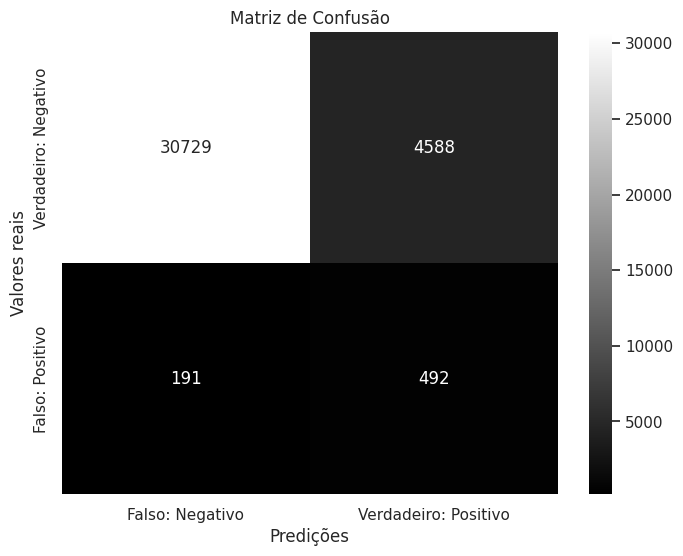

Matriz de Confusão:
[[30729  4588]
 [  191   492]]

Métricas de Avaliação:
Exatidão (Accuracy):  0.867
Precisão:  0.097
Sensibilidade (Recall):  0.720
F1-score:  0.171


In [67]:
#Importando as bibliotecas e tabela

#Gráficos para visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt

#Manipulação dos dados
import pandas as pd
import numpy as np

#Estatística
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier


# Valores utilizados
y_true = dataset['default_flag']
y_pred = dataset['score_flag']

# Cálculo e métricas de avaliação
cm = confusion_matrix(y_true, y_pred)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# mostrar matriz de confusão e métricas de avaliação
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='gray', xticklabels=['Falso: Negativo', 'Verdadeiro: Positivo'], yticklabels=['Verdadeiro: Negativo', 'Falso: Positivo'])
plt.title('Matriz de Confusão')
plt.xlabel('Predições')
plt.ylabel('Valores reais')
plt.show()

print("\033[1mMatriz de Confusão:\033[0m")
print(cm)
print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f"Exatidão (Accuracy): {accuracy: .3f}")
print(f"Precisão: {precision: .3f}")
print(f"Sensibilidade (Recall): {recall: .3f}")
print(f"F1-score: {f1: .3f}")

# **Regressão logística**

In [68]:
import pandas as pd
import numpy as np


### Importar el dataset

In [69]:
# dataset = pd.read_csv('/content/drive/MyDrive/Projeto3-Risco-Relativo/dataset_banco_v5.csv')
dataset = pd.read_csv('/content/drive/MyDrive/Projeto3-Risco-Relativo/dataset_banco_credit_score.csv')

In [70]:
dataset.describe()

user_id           age  number_dependents  default_flag  \
count  36000.000000  36000.000000       36000.000000  36000.000000   
mean   18000.500000     52.385250           0.728528      0.018972   
std    10392.449182     14.709916           1.071928      0.136429   
min        1.000000     21.000000           0.000000      0.000000   
25%     9000.750000     41.000000           0.000000      0.000000   
50%    18000.500000     52.000000           0.000000      0.000000   
75%    27000.250000     63.000000           1.000000      0.000000   
max    36000.000000     87.000000           4.000000      1.000000   

       debt_ratio_pct  last_month_salary  count_loan_real_estate  \
count    36000.000000       36000.000000            36000.000000   
mean     31478.338059        5067.536694                1.015611   
std      89632.970943        4587.557350                1.118363   
min          0.000000           0.000000                0.000000   
25%         17.630000        1500.000000                0.000000   
50%         36.620000        4370.000000                1.000000   
75%         87.352500        7416.000000                2.000000   
max     491100.000000       23000.000000               25.000000   

       count_loan_other   total_loans  more_90_days_overdue  ...  \
count      36000.000000  36000.000000          36000.000000  ...   
mean           7.465917      8.435944              0.084528  ...   
std            4.799923      4.984184              0.398676  ...   
min            0.000000      0.000000              0.000000  ...   
25%            4.000000      5.000000              0.000000  ...   
50%            7.000000      8.000000              0.000000  ...   
75%           10.000000     11.000000              0.000000  ...   
max           56.000000     25.000000              3.000000  ...   

       quartil_debt_ratio  dummy_debt_ratio  quartil_more_90_days  \
count         36000.00000      36000.000000           36000.00000   
mean              2.50000          1.000000               2.50000   
std               1.11805          1.000014               1.11805   
min               1.00000          0.000000               1.00000   
25%               1.75000          0.000000               1.75000   
50%               2.50000          1.000000               2.50000   
75%               3.25000          2.000000               3.25000   
max               4.00000          2.000000               4.00000   

       dummy_more_90_days  quartil_secured_lines  dummy_secured_lines  \
count        36000.000000            36000.00000         36000.000000   
mean             0.500000                2.50000             0.500000   
std              0.866037                1.11805             0.866037   
min              0.000000                1.00000             0.000000   
25%              0.000000                1.75000             0.000000   
50%              0.000000                2.50000             0.000000   
75%              0.500000                3.25000             0.500000   
max              2.000000                4.00000             2.000000   

       quartil_total_loans  dummy_total_loans         score    score_flag  
count          36000.00000       36000.000000  36000.000000  36000.000000  
mean               2.50000           0.500000      4.000000      0.141111  
std                1.11805           0.500007      2.330566      0.348141  
min                1.00000           0.000000      0.000000      0.000000  
25%                1.75000           0.000000      2.000000      0.000000  
50%                2.50000           0.500000      4.000000      0.000000  
75%                3.25000           1.000000      6.000000      0.000000  
max                4.00000           1.000000     10.000000      1.000000  

[8 rows x 26 columns]

In [71]:
dataset.head()

user_id  age sex  number_dependents  default_flag  debt_ratio_pct  \
0        3   54   M                  0             0           35.16   
1       17   79   M                  0             0            8.28   
2       38   67   F                  0             0            7.59   
3       49   83   M                  0             0           17.66   
4       52   72   M                  1             0           27.44   

   last_month_salary  count_loan_real_estate  count_loan_other  total_loans  \
0               5900                       1                14           15   
1              10500                       0                22           22   
2               4453                       0                 8            8   
3               4694                       1                 7            8   
4               5866                       2                15           17   

   ...                 risco_more_90_days  quartil_secured_lines  \
0  ...  menor risco de ser um mau pagador                      2   
1  ...  menor risco de ser um mau pagador                      2   
2  ...  menor risco de ser um mau pagador                      3   
3  ...  menor risco de ser um mau pagador                      1   
4  ...  menor risco de ser um mau pagador                      2   

   dummy_secured_lines                risco_secured_lines  \
0                    0  menor risco de ser um mau pagador   
1                    0  menor risco de ser um mau pagador   
2                    0  menor risco de ser um mau pagador   
3                    0  menor risco de ser um mau pagador   
4                    0  menor risco de ser um mau pagador   

   quartil_total_loans dummy_total_loans                   risco_total_loan  \
0                    4                 0  menor risco de ser um mau pagador   
1                    4                 0  menor risco de ser um mau pagador   
2                    3                 0  menor risco de ser um mau pagador   
3                    3                 0  menor risco de ser um mau pagador   
4                    4                 0  menor risco de ser um mau pagador   

   score                       score_result  score_flag  
0      0  pouco risco de ser um mau pagador           0  
1      0  pouco risco de ser um mau pagador           0  
2      0  pouco risco de ser um mau pagador           0  
3      0  pouco risco de ser um mau pagador           0  
4      0  pouco risco de ser um mau pagador           0  

[5 rows x 34 columns]

In [72]:
np.average(dataset.default_flag)

0.018972222222222224

## Detectando Outliers

In [73]:
# Função para identificar outliers usando o método IQR
def detect_outliers(df, columns):
    outliers = pd.DataFrame()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = (df[col] < lower_bound) | (df[col] > upper_bound)
    return outliers

# Identificar outliers nas colunas especificadas
columns_with_outliers = ['age', 'last_month_salary', 'debt_ratio_pct', 'total_loans', 'more_90_days_overdue', 'using_lines_not_secured_personal_assets_pct']
outliers = detect_outliers(dataset, columns_with_outliers)
print(outliers.sum())


age                                               0
last_month_salary                              1021
debt_ratio_pct                                 7579
total_loans                                     975
more_90_days_overdue                           1946
using_lines_not_secured_personal_assets_pct       0
dtype: int64


In [74]:
#Eliminarcion de Outliers
# dataset_cleaned = dataset[~(outliers.any(axis=1))]


## Nossas variáveis de interés

In [75]:
x = dataset.loc[:, ['age', 'last_month_salary', 'more_90_days_overdue', 'using_lines_not_secured_personal_assets_pct', 'debt_ratio_pct', 'total_loans']].values
y = dataset.loc[:, ['default_flag']].values



## Separacao de treino e teste por meio de sklearn

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Escalado de variáveis

In [77]:
from sklearn.preprocessing import StandardScaler
standard_x = StandardScaler()
x_train = standard_x.fit_transform(x_train)
x_test = standard_x.fit_transform(x_test)

In [78]:
x_train

array([[ 1.40235927, -1.1050713 , -0.21164574, -0.88114151, -0.34649337,
        -1.49279644],
       [ 1.74215812, -0.45152151, -0.21164574, -0.65121671, -0.34962867,
        -0.88930771],
       [ 1.33439951, -1.1050713 , -0.21164574, -0.85597562,  0.55868266,
        -0.68814479],
       ...,
       [-0.77235334,  1.56359033, -0.21164574, -0.78734135, -0.3493175 ,
        -0.28581897],
       [-1.04419241,  0.49394718,  4.7968976 ,  1.7567022 , -0.34961963,
        -0.08465606],
       [ 1.33439951,  0.63772813, -0.21164574, -0.08098033, -0.34966294,
        -0.68814479]])

## Treinar o modelo de Regressao Logistica

In [79]:
# Ajustar o modelo
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state = 0, class_weight='balanced')
reg.fit(x_train, y_train)

# Prediccion
pred = reg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [80]:
# Olhando o que contem a variável pred
pred, y_test

(array([0, 0, 0, ..., 0, 0, 0]),
 array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]))

### Matriz de Confusão e Consultando Score com Amostra de 10% (Undersampling)

In [81]:
# Matriz de confusao
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, pred)
conf_mat

array([[6769,  290],
       [   4,  137]])

### Curva de probabilidade de inadimplencia

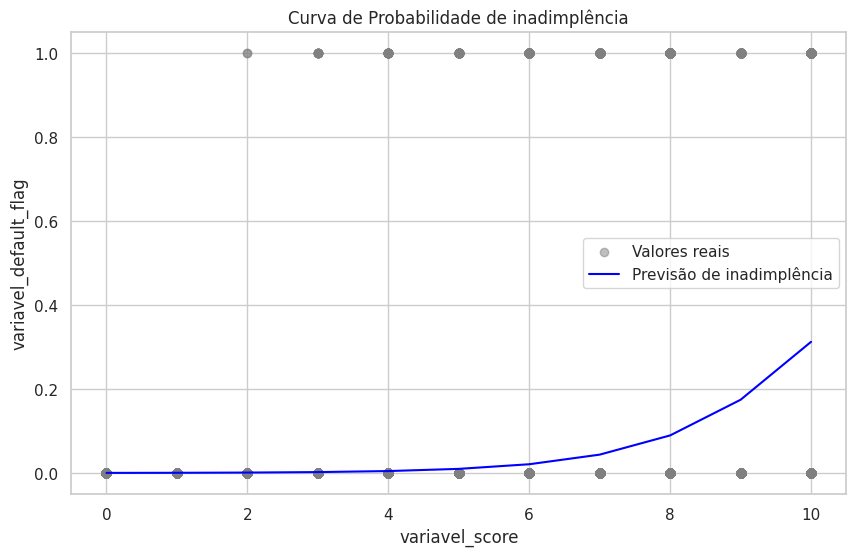

In [82]:
#Importando as bibliotecas e tabela
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

# Modelo de regressão logística
logistic_model = LogisticRegression()
logistic_model.fit(dataset[['score']], dataset['default_flag'])

probabilities = logistic_model.predict_proba(dataset[['score']])[:, 1]

# Inserindo o gráfico de dispersão
plt.figure(figsize=(10, 6))

# dados sendo inseridos
plt.scatter(dataset['score'], dataset['default_flag'], alpha=0.5, color='gray', label='Valores reais')

# Adicionando a curva de probabilidade da regressão logística
sorted_indices = np.argsort(dataset['score'])
sorted_score_dummy = dataset['score'].iloc[sorted_indices]
sorted_probabilities = probabilities[sorted_indices]
plt.plot(sorted_score_dummy, sorted_probabilities, color='blue', label='Previsão de inadimplência')

# Títulos e rótulos
plt.title('Curva de Probabilidade de inadimplência')
plt.xlabel('variavel_score')
plt.ylabel('variavel_default_flag')
plt.legend()

plt.show()

Este gráfico é útil para avaliar visualmente como as predições do modelo se comparam aos dados reais, ajudando a interpretar o desempenho da regressão logística na tarefa de previsão de inadimplência.

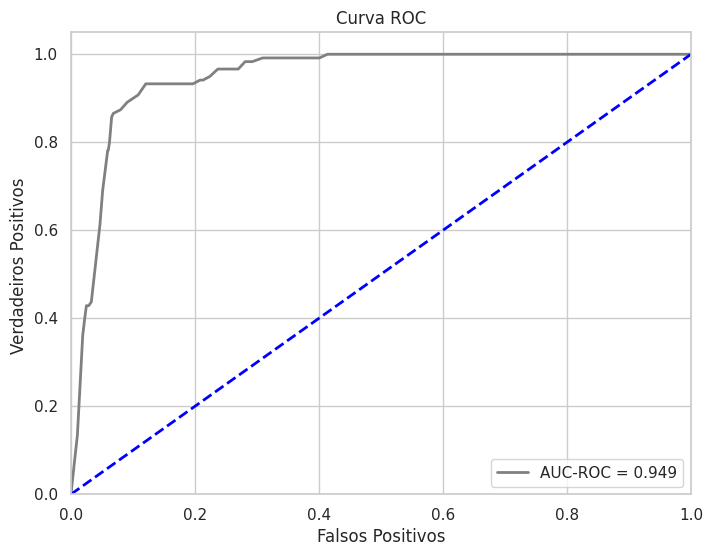

Regressão Logística:
[[6598  483]
 [  16  103]]

Métricas de Avaliação:
Exatidão (Accuracy):  0.931
Precisão:  0.176
Sensibilidade (Recall):  0.866
F1-score:  0.292
AUC-ROC:  0.949
Log-Loss:  0.288
Acurácia no conjunto de treino: 0.932
Acurácia no conjunto de teste: 0.931


In [83]:
#importando bibliotecas e tabelas

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, log_loss, roc_curve
from sklearn.feature_selection import RFE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Separar as características e a variável dependente
X = dataset[['dummy_age', 'dummy_last_month_salary', 'dummy_debt_ratio', 'dummy_more_90_days', 'dummy_secured_lines', 'dummy_total_loans']]
y = dataset['default_flag']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criando  modelo de regressão logística
model = LogisticRegression(class_weight='balanced')

# Aplicar Recursive Feature Elimination (RFE)
selector = RFE(model, n_features_to_select=1)
selector = selector.fit(X_train, y_train)

# Treinando o modelo
model.fit(X_train, y_train)

# Realizar predições no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calcular métricas de avaliação
tn, fp, fn, tp = conf_matrix.ravel()
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

# Calculando AUC-ROC e Log-Loss
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
log_loss_value = log_loss(y_test, model.predict_proba(X_test))

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])


# Exibir curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='gray', lw=2, label=f'AUC-ROC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdadeiros Positivos ')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Exibir resultados
print("\033[1mRegressão Logística:\033[0m")
print(conf_matrix)

print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f"Exatidão (Accuracy): {accuracy: .3f}")
print(f"Precisão: {precision: .3f}")
print(f"Sensibilidade (Recall): {sensitivity: .3f}")
print(f"F1-score: {f1_score: .3f}")
print(f"AUC-ROC: {roc_auc: .3f}")
print(f"Log-Loss: {log_loss_value: .3f}")

# Avaliar os modelos de teste e treino
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Acurácia no conjunto de treino: {train_accuracy:.3f}')
print(f'Acurácia no conjunto de teste: {test_accuracy:.3f}')

A curva ROC é uma representação gráfica da performance de um modelo de classificação. Quanto mais a curva se aproxima do canto superior esquerdo do gráfico, melhor é o desempenho do modelo. Isso indica uma alta taxa de verdadeiros positivos e uma baixa taxa de falsos positivos, o que são características desejáveis em um classificador. Por outro lado, uma curva ROC que se aproxima da diagonal (linha de 45 graus) sugere que o modelo não possui capacidade de discriminação significativa entre as classes positiva e negativa. Os resultados indicam que o modelo tem uma boa capacidade de distinguir entre clientes que serão inadimplentes e os que não serão, , com uma alta taxa de exatidão geral. No entanto, a precisão é relativamente baixa, o que significa que há uma proporção considerável de falsos positivos em relação às predições positivas. Isso pode ser incluído como uma melhoria futura, dessa forma, podemos experimentar modelos variados ou realizar ajustes para que os resultados ocorram de forma mais precisa.

## Mesma regresao logistica mas com as variáveis dummys de interes

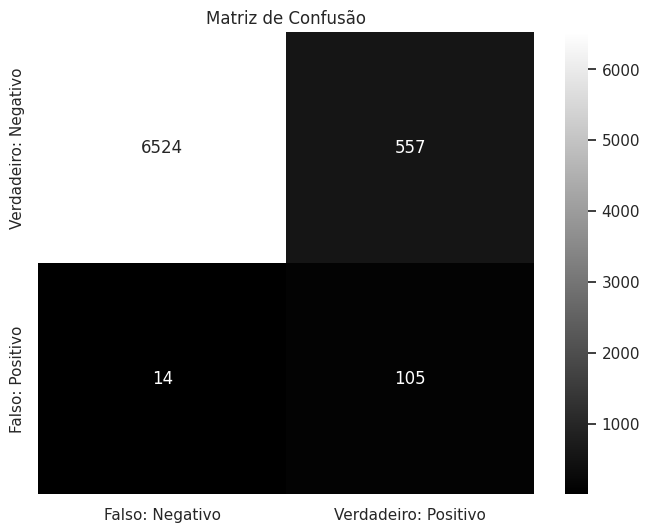

Matriz de Confusão:
[[6524  557]
 [  14  105]]

Métricas de Avaliação:
Exatidão (Accuracy):  0.921
Precisão:  0.159
Sensibilidade (Recall): 0.882
F1-score: 0.269


In [84]:
#  oversampling (aumentando o número de clientes de alto risco no conjunto de treinamento) apenas duplica exemplos existentes, sem introduzir variação.
# O SMOTE (Synthetic Minority Over-sampling Technique) : criando exemplos sintéticos baseados em vizinhos próximos da classe minoritária.
# Essas técnicas ajudam a balancear as classes no conjunto de dados, melhorando o desempenho de modelos de classificação.

#Gráficos para visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt

#Manipulação dos dados
import pandas as pd
import numpy as np

#Estatística
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


# Separar as características (X) e a variável dependente (y)
X = dataset[['dummy_age', 'dummy_last_month_salary', 'dummy_debt_ratio', 'dummy_more_90_days', 'dummy_secured_lines', 'dummy_total_loans']]
y = dataset['default_flag']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar as características (opcional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Aplicação do SMOTE aos dados de treinamento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Criar o modelo de RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Treinar o modelo com os dados resampleados
model.fit(X_train_resampled, y_train_resampled)

# Realizar predições no conjunto de teste
y_pred = model.predict(X_test)

# Métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Cálculo da matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir matriz de confusão ajustado a cores e legenda
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='gray', xticklabels=['Falso: Negativo', 'Verdadeiro: Positivo'], yticklabels=['Verdadeiro: Negativo', 'Falso: Positivo'])
plt.title('Matriz de Confusão')
plt.show()

# Exibir matriz de confusão - Resultados
print("\033[1mMatriz de Confusão:\033[0m")
print(conf_matrix)

# Métricas de Avaliação do Modelo
print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f"Exatidão (Accuracy): {accuracy: .3f}")
print(f"Precisão: {precision: .3f}")
print(f"Sensibilidade (Recall): {recall:.3f}")
print(f"F1-score: {f1:.3f}")